In [470]:
import pandas as pd

In [582]:
dataset = pd.read_csv('Churn_Modelling_treated.csv')
del dataset['HasCrCard']

In [364]:
data = pd.read_csv('Churn_Modelling.csv')
del data['RowNumber']
numeric_data = data.copy()

for column in ['Surname', 'Geography', 'Gender']:
    numeric_data[column] = numeric_data[column].astype('category').cat.codes
dataset = numeric_data.copy()
del dataset['CustomerId']
del dataset['Surname']

In [472]:
import joblib

In [583]:
random_forest = joblib.load('random_forest.joblib')
random_forest_scaled = joblib.load('random_forest_scaled.joblib')
random_forest_smote = joblib.load('random_forest_smote.joblib')

xgboost = joblib.load('xgboost.joblib')
xgboost_scaled = joblib.load('xgboost_scaled.joblib')

decision_trees = joblib.load('decision_trees.joblib')
decision_trees_scaled = joblib.load('decision_trees_scaled.joblib')

svm = joblib.load('svm.joblib')
svm_scaled = joblib.load('svm_scaled.joblib')

logreg = joblib.load('logreg.joblib')
logreg_smote = joblib.load('logreg_smote.joblib')
logreg_rfe = joblib.load('logreg_rfe.joblib')
logreg_rfe_smote = joblib.load('logreg_rfe_smote.joblib')

In [584]:
from sklearn.model_selection import train_test_split

In [585]:
points = dataset['Exited']
values = dataset.drop(['Exited'], axis = 1)

In [586]:
train_values, test_values, train_points, test_points = train_test_split(values, points, test_size = 0.3, random_state = 777)

In [587]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [588]:
smote = SMOTE()

train_values_resampled, train_points_resampled = smote.fit_resample(train_values, train_points)

In [589]:
scaler = MinMaxScaler()
scaler.fit(values)

train_values_scaled = scaler.transform(train_values)
test_values_scaled = scaler.transform(test_values)

In [590]:
train_values_resampled_scaled = scaler.transform(train_values_resampled)

In [591]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [592]:
model_results = list()

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    2056                      86
Actual Positive (1)                     301                     224

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2142
           1       0.72      0.43      0.54       525

    accuracy                           0.85      2667
   macro avg       0.80      0.69      0.73      2667
weighted avg       0.84      0.85      0.84      2667



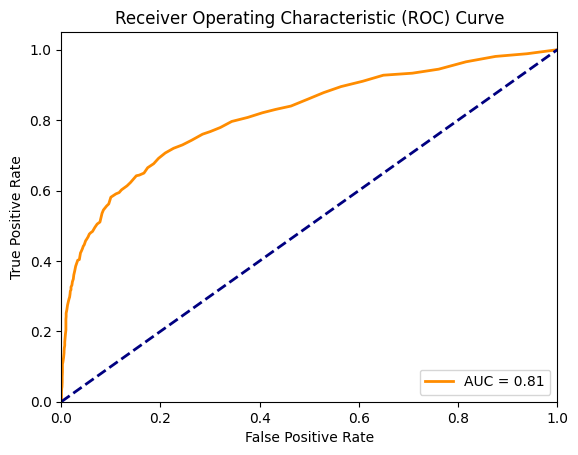

AUC-ROC: 0.81


In [593]:
random_forest.fit(train_values, train_points)

y_pred = random_forest.predict(test_values)
y_prob = random_forest.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [594]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'RandomForest',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    2061                      81
Actual Positive (1)                     302                     223

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2142
           1       0.73      0.42      0.54       525

    accuracy                           0.86      2667
   macro avg       0.80      0.69      0.73      2667
weighted avg       0.84      0.86      0.84      2667



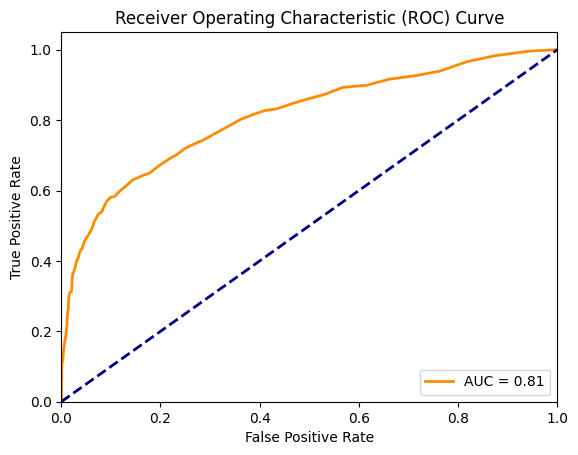

AUC-ROC: 0.81


In [595]:
random_forest_scaled.fit(train_values_scaled, train_points)

y_pred = random_forest_scaled.predict(test_values_scaled)
y_prob = random_forest_scaled.predict_proba(test_values_scaled)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)

print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [596]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'RandomForestScaled',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    1835                     307
Actual Positive (1)                     224                     301

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2142
           1       0.50      0.57      0.53       525

    accuracy                           0.80      2667
   macro avg       0.69      0.72      0.70      2667
weighted avg       0.81      0.80      0.81      2667



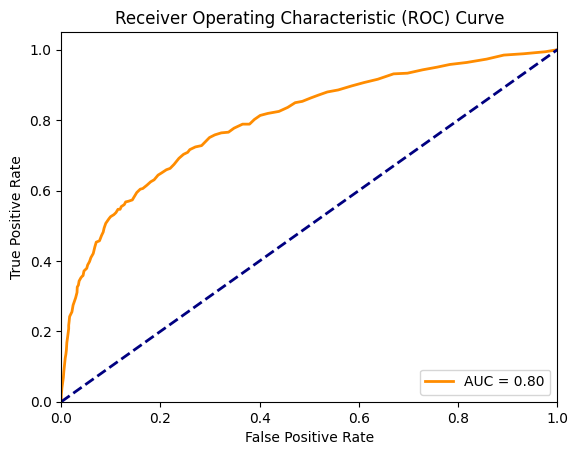

AUC-ROC: 0.80


In [597]:
random_forest_smote.fit(train_values_resampled, train_points_resampled)

y_pred = random_forest_smote.predict(test_values)
y_prob = random_forest_smote.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)

print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [598]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'RandomForestSmote',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    2025                     117
Actual Positive (1)                     299                     226

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2142
           1       0.66      0.43      0.52       525

    accuracy                           0.84      2667
   macro avg       0.77      0.69      0.71      2667
weighted avg       0.83      0.84      0.83      2667



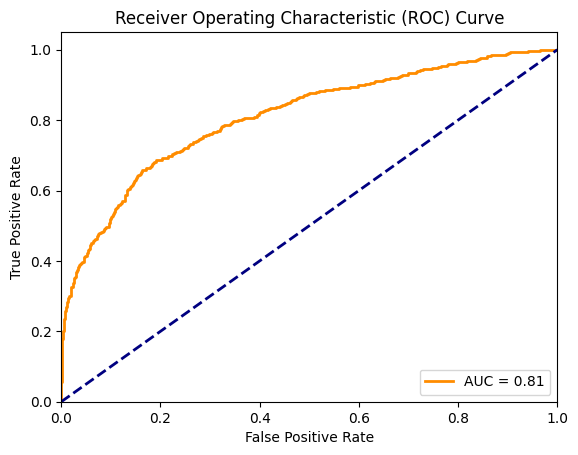

AUC-ROC: 0.81


In [599]:
xgboost.fit(train_values, train_points)

y_pred = xgboost.predict(test_values)
y_prob = xgboost.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [600]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'Xgboost',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    2025                     117
Actual Positive (1)                     299                     226

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2142
           1       0.66      0.43      0.52       525

    accuracy                           0.84      2667
   macro avg       0.77      0.69      0.71      2667
weighted avg       0.83      0.84      0.83      2667



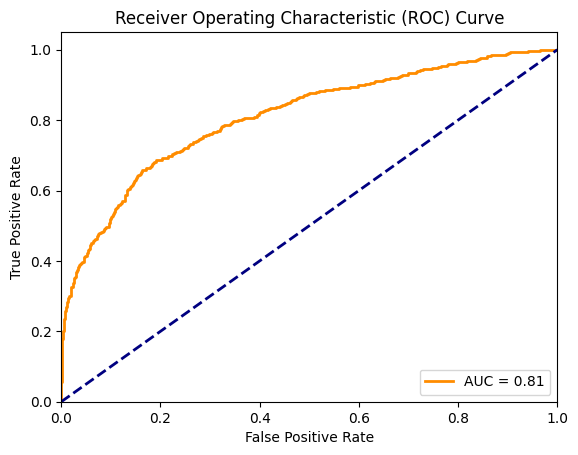

AUC-ROC: 0.81


In [601]:
xgboost_scaled.fit(train_values_scaled, train_points)

y_pred = xgboost_scaled.predict(test_values_scaled)
y_prob = xgboost_scaled.predict_proba(test_values_scaled)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)

print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [602]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'XgboostScaled',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    1827                     315
Actual Positive (1)                     222                     303

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2142
           1       0.49      0.58      0.53       525

    accuracy                           0.80      2667
   macro avg       0.69      0.72      0.70      2667
weighted avg       0.81      0.80      0.80      2667



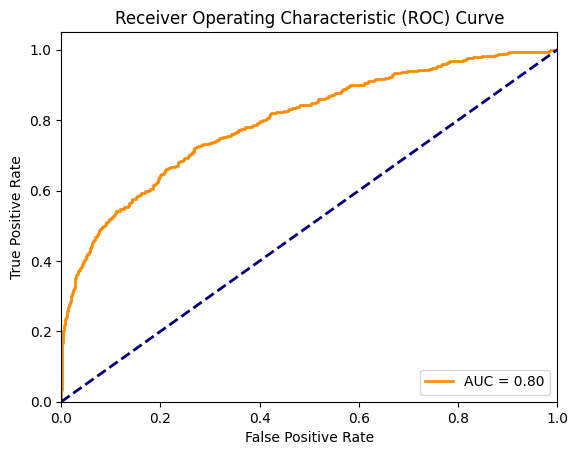

AUC-ROC: 0.80


In [603]:
xgboost.fit(train_values_resampled, train_points_resampled)

y_pred = xgboost.predict(test_values)
y_prob = xgboost.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)

print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [604]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'XgboostSmote',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    1795                     347
Actual Positive (1)                     275                     250

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2142
           1       0.42      0.48      0.45       525

    accuracy                           0.77      2667
   macro avg       0.64      0.66      0.65      2667
weighted avg       0.78      0.77      0.77      2667



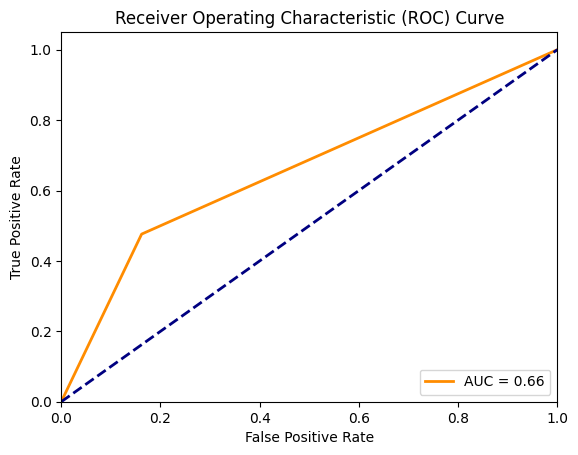

AUC-ROC: 0.66


In [605]:
decision_trees.fit(train_values, train_points)

y_pred = decision_trees.predict(test_values)
y_prob = decision_trees.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [606]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'DecisionTrees',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    1819                     323
Actual Positive (1)                     277                     248

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2142
           1       0.43      0.47      0.45       525

    accuracy                           0.78      2667
   macro avg       0.65      0.66      0.66      2667
weighted avg       0.78      0.78      0.78      2667



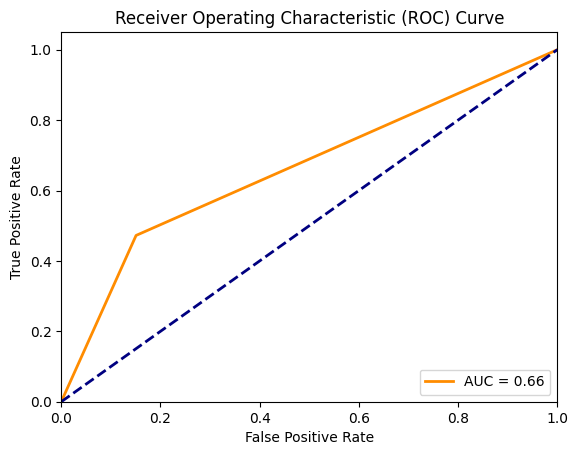

AUC-ROC: 0.66


In [607]:
decision_trees_scaled.fit(train_values_scaled, train_points)

y_pred = decision_trees_scaled.predict(test_values_scaled)
y_prob = decision_trees_scaled.predict_proba(test_values_scaled)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [608]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'DecisionTreesScaled',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    1644                     498
Actual Positive (1)                     224                     301

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2142
           1       0.38      0.57      0.45       525

    accuracy                           0.73      2667
   macro avg       0.63      0.67      0.64      2667
weighted avg       0.78      0.73      0.75      2667



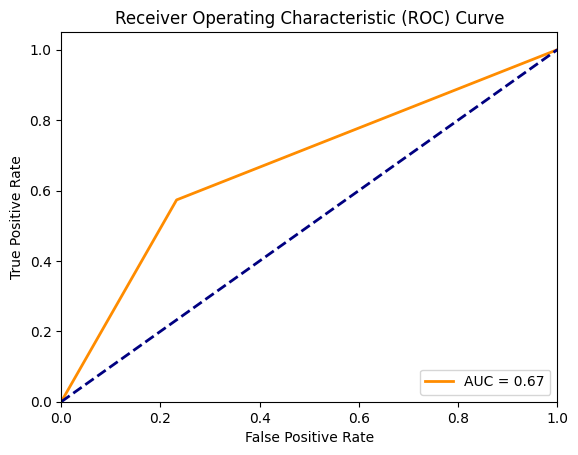

AUC-ROC: 0.67


In [609]:
decision_trees.fit(train_values_resampled, train_points_resampled)

y_pred = decision_trees.predict(test_values)
y_prob = decision_trees.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [610]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'DecisionTreesSmote',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     818                    1324
Actual Positive (1)                     112                     413

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.38      0.53      2142
           1       0.24      0.79      0.37       525

    accuracy                           0.46      2667
   macro avg       0.56      0.58      0.45      2667
weighted avg       0.75      0.46      0.50      2667



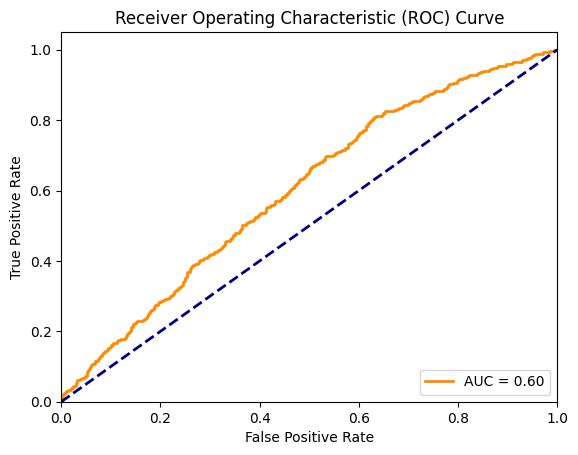

AUC-ROC: 0.60


In [611]:
svm.fit(train_values, train_points)

y_pred = svm.predict(test_values)
y_prob = svm.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [612]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'SVM',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    1695                     447
Actual Positive (1)                     169                     356

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      2142
           1       0.44      0.68      0.54       525

    accuracy                           0.77      2667
   macro avg       0.68      0.73      0.69      2667
weighted avg       0.82      0.77      0.79      2667



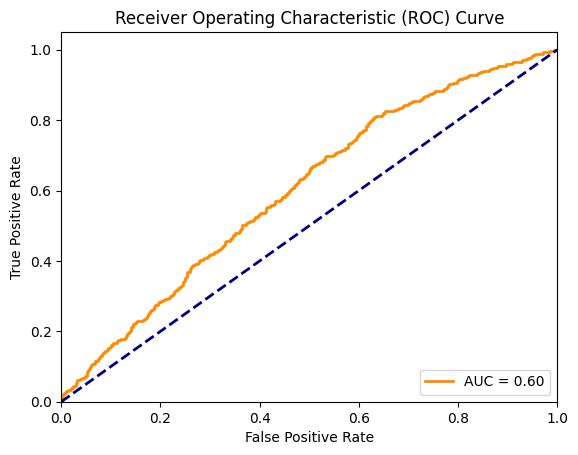

AUC-ROC: 0.60


In [613]:
svm_scaled.fit(train_values_scaled, train_points)

y_pred = svm_scaled.predict(test_values_scaled)
y_prob = svm.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [614]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'SVMScaled',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     818                    1324
Actual Positive (1)                     112                     413

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.38      0.53      2142
           1       0.24      0.79      0.37       525

    accuracy                           0.46      2667
   macro avg       0.56      0.58      0.45      2667
weighted avg       0.75      0.46      0.50      2667



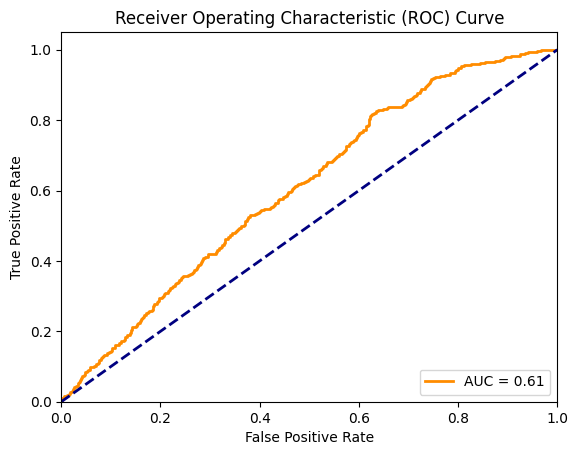

AUC-ROC: 0.61


In [615]:
svm.fit(train_values_resampled, train_points_resampled)

y_pred = svm.predict(test_values)
y_prob = svm.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [616]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'SVMSmote',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

C:\Users\micro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    1784                     358
Actual Positive (1)                     207                     318

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2142
           1       0.47      0.61      0.53       525

    accuracy                           0.79      2667
   macro avg       0.68      0.72      0.70      2667
weighted avg       0.81      0.79      0.80      2667



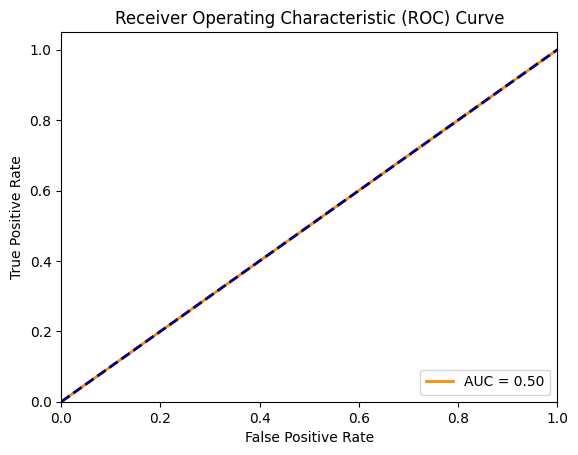

AUC-ROC: 0.50


In [617]:
svm.fit(train_values_resampled_scaled, train_points_resampled)

y_pred = svm.predict(test_values_scaled)
y_prob = svm.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [618]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'SVMScaledSmote',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

neural_networks
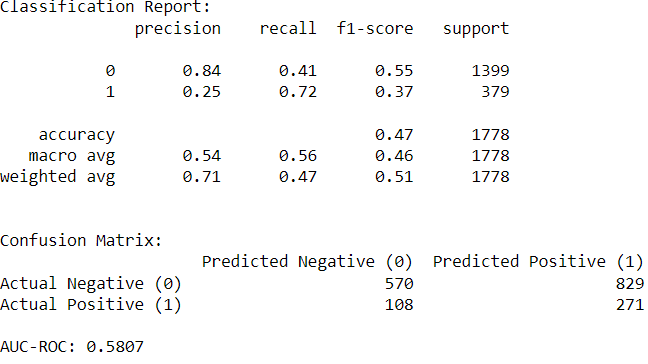


Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    2057                      85
Actual Positive (1)                     387                     138

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2142
           1       0.62      0.26      0.37       525

    accuracy                           0.82      2667
   macro avg       0.73      0.61      0.63      2667
weighted avg       0.80      0.82      0.79      2667



C:\Users\micro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


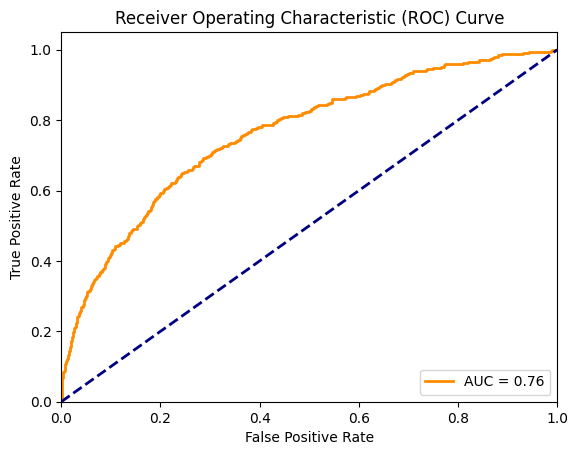

AUC-ROC: 0.76


In [619]:
logreg.fit(train_values, train_points)

y_pred = logreg.predict(test_values)
y_prob = logreg.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [620]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'Logreg',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    1637                     505
Actual Positive (1)                     198                     327

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2142
           1       0.39      0.62      0.48       525

    accuracy                           0.74      2667
   macro avg       0.64      0.69      0.65      2667
weighted avg       0.79      0.74      0.76      2667



C:\Users\micro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


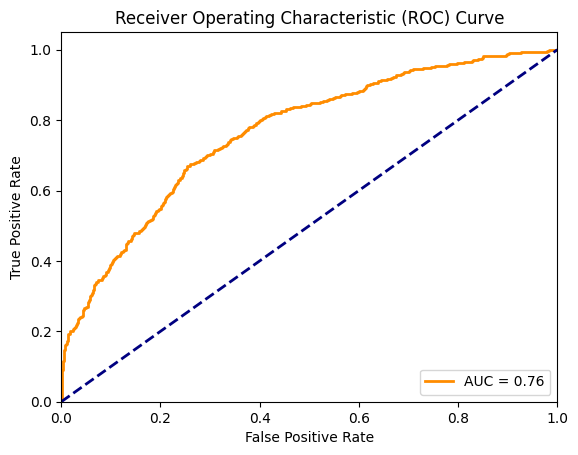

AUC-ROC: 0.76


In [621]:
logreg_smote.fit(train_values_resampled, train_points_resampled)

y_pred = logreg_smote.predict(test_values)
y_prob = logreg_smote.predict_proba(test_values)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [622]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'LogregSmote',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                    2078                      64
Actual Positive (1)                     366                     159

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2142
           1       0.71      0.30      0.43       525

    accuracy                           0.84      2667
   macro avg       0.78      0.64      0.67      2667
weighted avg       0.82      0.84      0.81      2667



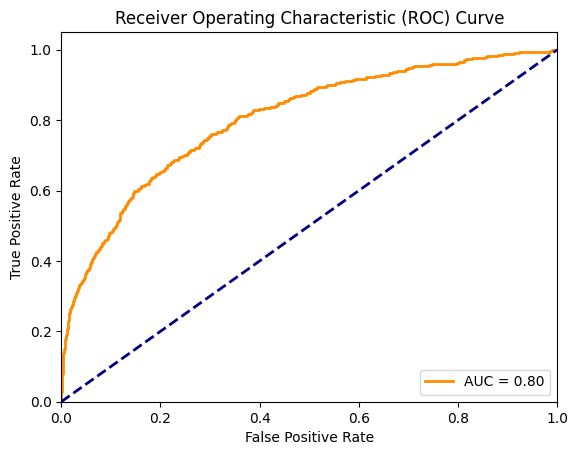

AUC-ROC: 0.80


In [623]:
logreg.fit(train_values_scaled, train_points)

y_pred = logreg.predict(test_values_scaled)
y_prob = logreg.predict_proba(test_values_scaled)[:, 1]

conf_matrix = confusion_matrix(test_points, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative (0)', 'Actual Positive (1)'], 
                              columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print("Confusion Matrix:")
print(conf_matrix_df)


print("\nClassification Report:")
print(classification_report(test_points, y_pred))

fpr, tpr, thresholds = roc_curve(test_points, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc:.2f}")

In [624]:
report_dict = classification_report(test_points, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

precision_class_0 = report_df.loc['0', 'precision']
precision_class_1 = report_df.loc['1', 'precision']
recall_class_0 = report_df.loc['0', 'recall']
recall_class_1 = report_df.loc['1', 'recall']

model_results.append({
    'Model': 'LogregScaled',
    'Precision_Class_0': precision_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_0': recall_class_0,
    'Recall_Class_1': recall_class_1,
    'Accuracy': report_dict['accuracy'],
    'F1-Score_Class_0': report_df.loc['0', 'f1-score'],
    'F1-Score_Class_1': report_df.loc['1', 'f1-score']
})

In [625]:
results_df = pd.DataFrame(model_results)

In [626]:
results_df

,Model,Precision_Class_0,Precision_Class_1,Recall_Class_0,Recall_Class_1,Accuracy,F1-Score_Class_0,F1-Score_Class_1
0,RandomForest,0.872295,0.722581,0.959851,0.426667,0.854893,0.913981,0.536527
1,RandomForestScaled,0.872196,0.733553,0.962185,0.424762,0.856393,0.914983,0.537998
2,RandomForestSmote,0.891209,0.495066,0.856676,0.573333,0.800900,0.873602,0.531333
3,Xgboost,0.871343,0.658892,0.945378,0.430476,0.844019,0.906852,0.520737
4,XgboostScaled,0.871343,0.658892,0.945378,0.430476,0.844019,0.906852,0.520737
5,XgboostSmote,0.891654,0.490291,0.852941,0.577143,0.798650,0.871868,0.530184
6,DecisionTrees,0.867150,0.418760,0.838002,0.476190,0.766779,0.852327,0.445633
7,DecisionTreesScaled,0.867844,0.434326,0.849206,0.472381,0.775028,0.858424,0.452555
8,DecisionTreesSmote,0.880086,0.376721,0.767507,0.573333,0.729284,0.819950,0.454683
9,SVM,0.879570,0.237766,0.381886,0.786667,0.461567,0.532552,0.365164


In [627]:
orted_by_precision = results_df.sort_values(by=['Precision_Class_1', 'Precision_Class_0'], ascending=False)
print("Сортировка по Precision:")
print(sorted_by_precision[['Model', 'Precision_Class_1', 'Precision_Class_0']])

Сортировка по Precision:
                  Model  Precision_Class_1  Precision_Class_0
0          RandomForest           0.708054           0.858168
1    RandomForestScaled           0.693878           0.855457
15         LogregScaled           0.693467           0.834279
3               Xgboost           0.631429           0.859301
4         XgboostScaled           0.631429           0.859301
13               Logreg           0.523810           0.813492
2     RandomForestSmote           0.513468           0.883261
5          XgboostSmote           0.512690           0.882466
12       SVMScaledSmote           0.484245           0.876453
6         DecisionTrees           0.464348           0.866157
7   DecisionTreesScaled           0.460317           0.863810
10            SVMScaled           0.453728           0.897300
14          LogregSmote           0.424899           0.879149
8    DecisionTreesSmote           0.409946           0.874155
9                   SVM           0.238797   

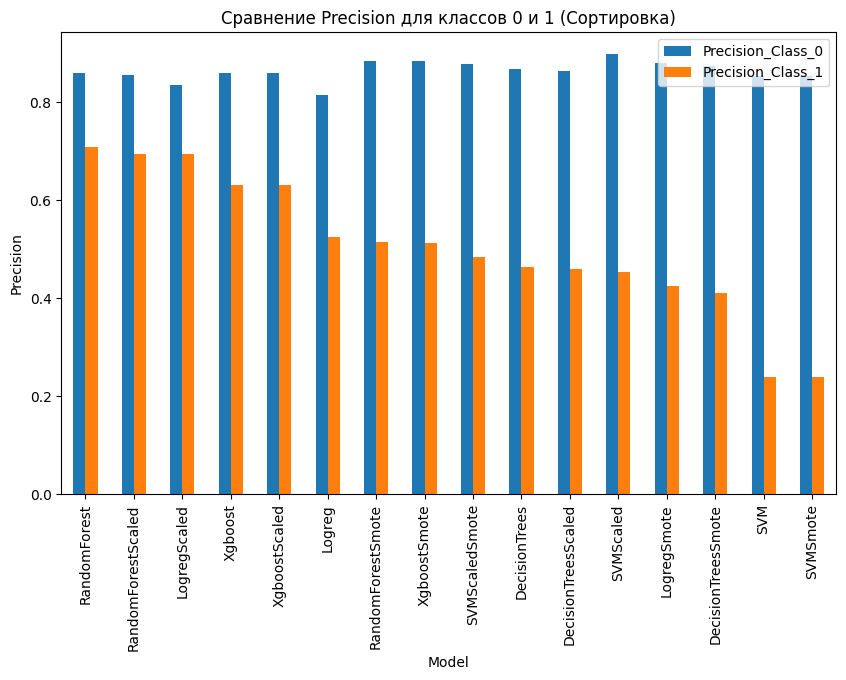

In [628]:
sorted_by_precision.plot(x='Model', y=['Precision_Class_0', 'Precision_Class_1'], kind='bar', figsize=(10, 6))
plt.title('Сравнение Precision для классов 0 и 1 (Сортировка)')
plt.ylabel('Precision')
plt.show()

In [629]:
sorted_by_recall = results_df.sort_values(by=['Recall_Class_1', 'Recall_Class_0'], ascending=False)
print("\nСортировка по Recall:")
print(sorted_by_recall[['Model', 'Recall_Class_1', 'Recall_Class_0']])


Сортировка по Recall:
                  Model  Recall_Class_1  Recall_Class_0
9                   SVM        0.786667        0.381886
11             SVMSmote        0.786667        0.381886
10            SVMScaled        0.678095        0.791317
14          LogregSmote        0.622857        0.764239
12       SVMScaledSmote        0.605714        0.832866
5          XgboostSmote        0.577143        0.852941
2     RandomForestSmote        0.573333        0.856676
8    DecisionTreesSmote        0.573333        0.767507
6         DecisionTrees        0.476190        0.838002
7   DecisionTreesScaled        0.472381        0.849206
3               Xgboost        0.430476        0.945378
4         XgboostScaled        0.430476        0.945378
0          RandomForest        0.426667        0.959851
1    RandomForestScaled        0.424762        0.962185
15         LogregScaled        0.302857        0.970121
13               Logreg        0.262857        0.960317


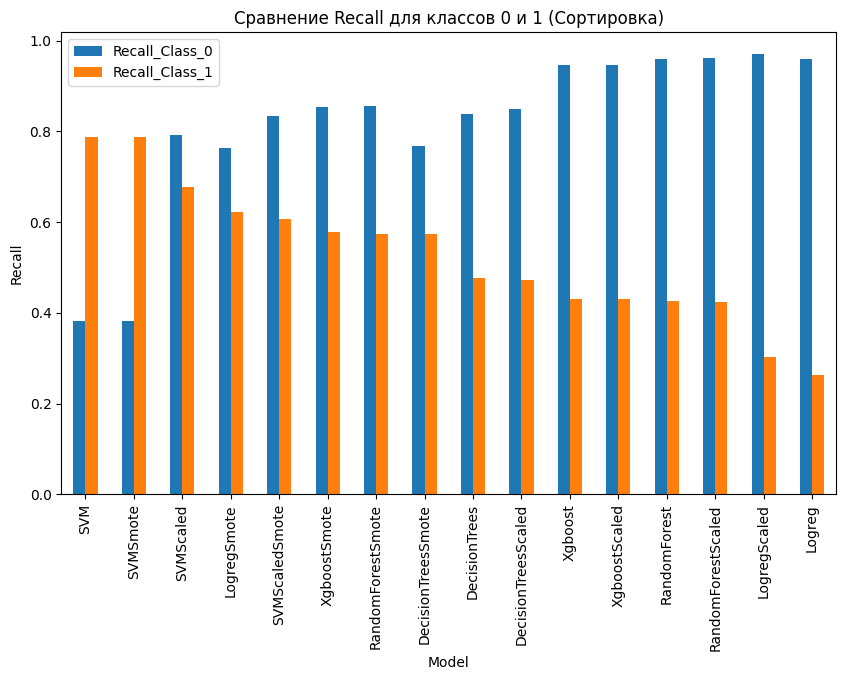

In [630]:
sorted_by_recall.plot(x='Model', y=['Recall_Class_0', 'Recall_Class_1'], kind='bar', figsize=(10, 6))
plt.title('Сравнение Recall для классов 0 и 1 (Сортировка)')
plt.ylabel('Recall')
plt.show()

In [631]:
sorted_by_accuracy = results_df.sort_values(by='Accuracy', ascending=False)
print("\nСортировка по Accuracy:")
print(sorted_by_accuracy[['Model', 'Accuracy']])


Сортировка по Accuracy:
                  Model  Accuracy
1    RandomForestScaled  0.856393
0          RandomForest  0.854893
3               Xgboost  0.844019
4         XgboostScaled  0.844019
15         LogregScaled  0.838770
13               Logreg  0.823022
2     RandomForestSmote  0.800900
5          XgboostSmote  0.798650
12       SVMScaledSmote  0.788151
7   DecisionTreesScaled  0.775028
10            SVMScaled  0.769029
6         DecisionTrees  0.766779
14          LogregSmote  0.736408
8    DecisionTreesSmote  0.729284
9                   SVM  0.461567
11             SVMSmote  0.461567


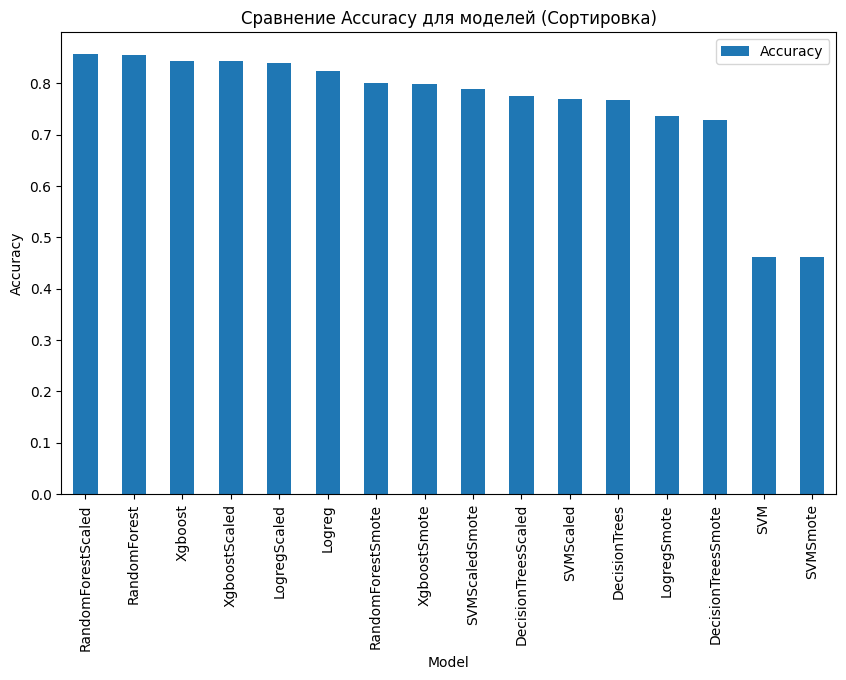

In [632]:
sorted_by_accuracy.plot(x='Model', y='Accuracy', kind='bar', figsize=(10, 6))
plt.title('Сравнение Accuracy для моделей (Сортировка)')
plt.ylabel('Accuracy')
plt.show()

In [633]:
sorted_by_f1_score = results_df.sort_values(by=['F1-Score_Class_1', 'F1-Score_Class_0'], ascending=False)
print("\nСортировка по F1-Score:")
print(sorted_by_f1_score[['Model', 'F1-Score_Class_1', 'F1-Score_Class_0']])


Сортировка по F1-Score:
                  Model  F1-Score_Class_1  F1-Score_Class_0
1    RandomForestScaled          0.537998          0.914983
0          RandomForest          0.536527          0.913981
10            SVMScaled          0.536145          0.846231
2     RandomForestSmote          0.531333          0.873602
5          XgboostSmote          0.530184          0.871868
12       SVMScaledSmote          0.529559          0.863295
3               Xgboost          0.520737          0.906852
4         XgboostScaled          0.520737          0.906852
14          LogregSmote          0.481945          0.823234
8    DecisionTreesSmote          0.454683          0.819950
7   DecisionTreesScaled          0.452555          0.858424
6         DecisionTrees          0.445633          0.852327
15         LogregScaled          0.425134          0.906236
13               Logreg          0.368984          0.897078
9                   SVM          0.365164          0.532552
11             

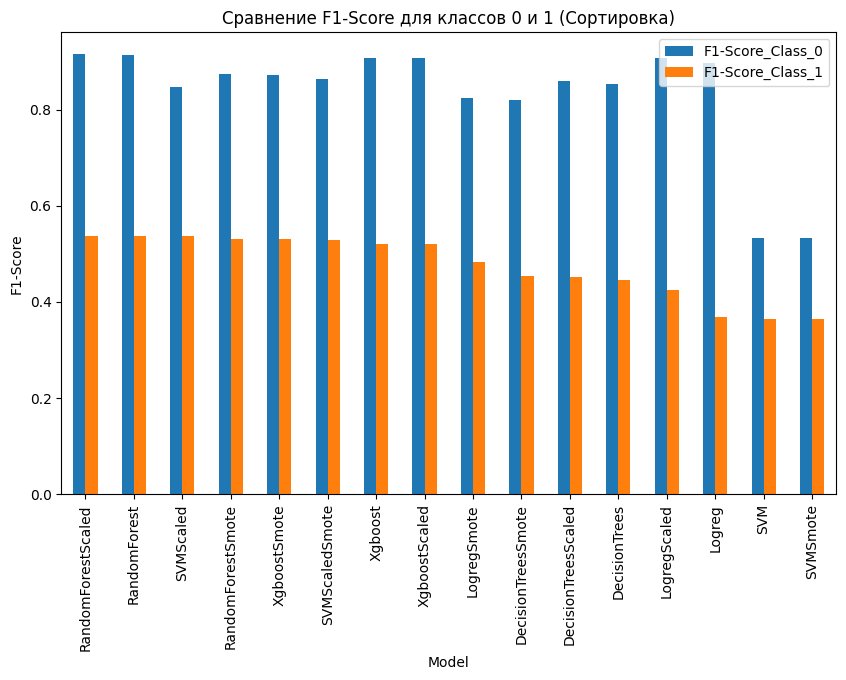

In [634]:
sorted_by_f1_score.plot(x='Model', y=['F1-Score_Class_0', 'F1-Score_Class_1'], kind='bar', figsize=(10, 6))
plt.title('Сравнение F1-Score для классов 0 и 1 (Сортировка)')
plt.ylabel('F1-Score')
plt.show()

При прогнозировании оттока клиентов банка основной целью является предсказание как можно большего количества клиентов, которые собираются уйти. В связи с этим recall для класса 1 становится основной метрикой при выборе модели.

In [640]:
sorted_by_recall.head(5)

,Model,Precision_Class_0,Precision_Class_1,Recall_Class_0,Recall_Class_1,Accuracy,F1-Score_Class_0,F1-Score_Class_1
9,SVM,0.879570,0.237766,0.381886,0.786667,0.461567,0.532552,0.365164
11,SVMSmote,0.879570,0.237766,0.381886,0.786667,0.461567,0.532552,0.365164
10,SVMScaled,0.909335,0.443337,0.791317,0.678095,0.769029,0.846231,0.536145
14,LogregSmote,0.892098,0.393029,0.764239,0.622857,0.736408,0.823234,0.481945
12,SVMScaledSmote,0.896032,0.470414,0.832866,0.605714,0.788151,0.863295,0.529559


Модель SVMScaled предлагает хорошее сочетание точности и полноты, что делает её эффективной для решения задачи прогнозирования оттока клиентов.

In [641]:
import joblib

In [642]:
joblib.dump(svm_scaled, 'SVMScaled.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']